# Classification

## Heart Disease

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [18]:
df = pd.read_csv(r'\Users\97254\Desktop\Heart Disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Dictionary Of The Various Features
**age** - age in years

**sex**-
    * 0 : female
    * 1 : male
**cp** - chest pain type
    * 0 : Typical angina: chest pain related decrease blood supply to the heart
    * 1 : Atypical angina: chest pain not related to heart
    * 2 : Non-anginal pain: typically esophageal spasms (non heart related)
    * 3 : Asymptomatic: chest pain not showing signs of disease
**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
**chol** - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern

**fbs** - (fasting blood sugar > 120 mg/dl)
    * 0 : false
    * 1 : true
    * '>126' mg/dL signals diabetes
**restecg** - resting electrocardiographic results
    * 0 : Nothing to note
    * 1 : ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
**thalach** - maximum heart rate achieved

**exang** - exercise induced angina
    * 0 : no
    * 1 : yes
**oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**slope** - the slope of the peak exercise ST segment
    * 0 : Upsloping: better heart rate with excercise (uncommon)
    * 1 : Flatsloping: minimal change (typical healthy heart)
    * 2 : Downslopins: signs of unhealthy heart
**ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
**thal** - thalium stress result
    * 0 : normal
    * 1 : fixed defect
    * 2 : reversable defect
**target** - have disease or not (= the predicted attribute)
    * 0 : no
    * 1 : yes

In [4]:
df.shape

(1025, 14)

There are 1025 subjects and 14 features in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are no NaN values in this dataset. We can see that the dataset is clean and ready to work with.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Vizualization

### How is the dataset divided? What is the percentage of the sick compared to the percentage of the healthy?

The number of patients with heart disease:  526
The number of patients without heart disease:  499


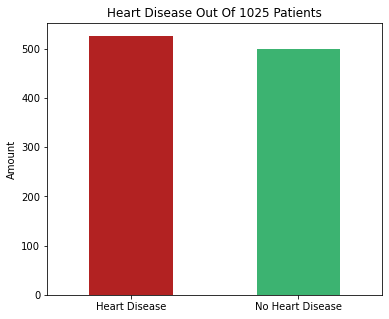

In [6]:
df.target.value_counts().plot(kind='bar',  color=['firebrick' , 'mediumseagreen'] , figsize=(6, 5));
plt.xticks([0, 1], ["Heart Disease", "No Heart Disease"], rotation=0);
plt.title("Heart Disease Out Of 1025 Patients")
plt.ylabel("Amount")

print("The number of patients with heart disease: ", len(df[df['target'] == 1]))
print("The number of patients without heart disease: ", len(df[df['target'] == 0]))

We can see that the dataset is evenly divided by sick subjects and healthy subjects.

Let's check the percentage of Males and females.

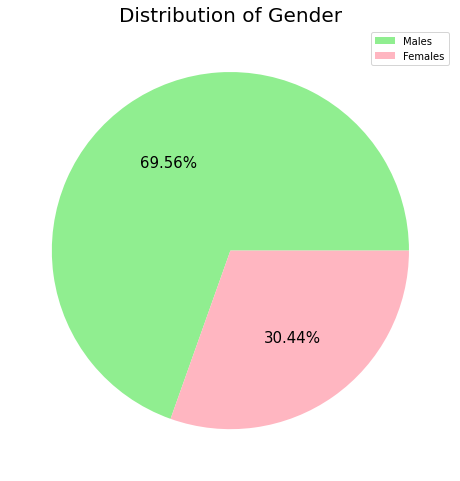

In [7]:
plt.subplots(figsize=(8, 9))
plt.pie(df['sex'].value_counts(), colors = ['lightgreen', 'lightpink'], autopct = '%.2f%%' , textprops={"fontsize":15})
plt.title('Distribution of Gender' , fontdict = {'fontsize' : 20})
plt.legend(["Males" , "Females"] , loc=1)

plt.show()

([<matplotlib.axis.XTick at 0x1aa7f75dbe0>,
 [Text(0, 0, 'No Heart Disease'), Text(0, 0, 'Heart Disease')])

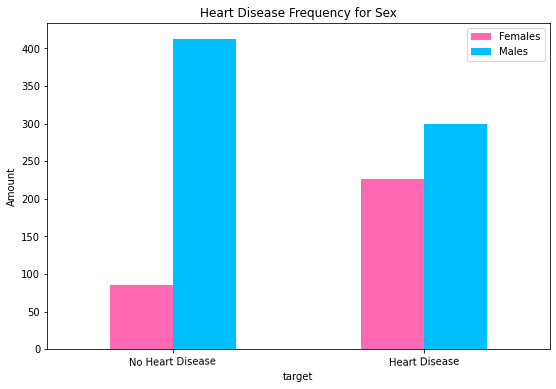

In [8]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(9, 6),
                                    color=['hotpink', 'deepskyblue'])
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount")
plt.legend(["Females", "Males"])
plt.xticks([0, 1], ["No Heart Disease", "Heart Disease"], rotation=1)

There are more men in the dataset. We can only assume that men suffer from heart disease more than women and so they are checked. <br> This asssuming can not explain why from all women it looks like about $\frac{3}{4}$ are sick and from all men most are actually healthy.

### what are the Ages of all subjects and how are they divided?

Text(0.5, 1.0, 'All Patients Ages Histograma')

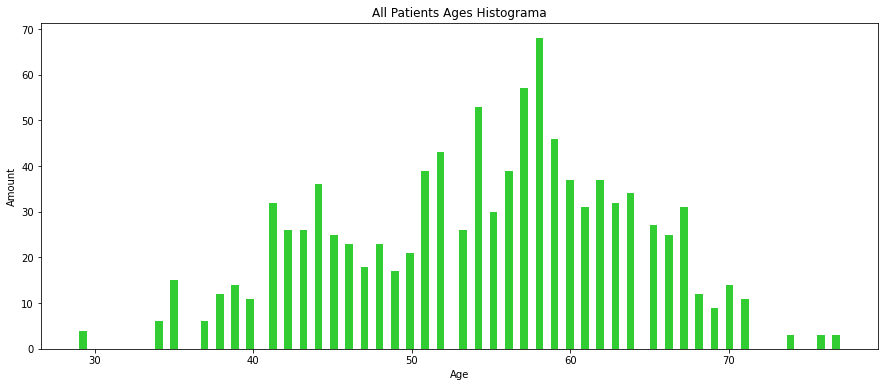

In [9]:
df.age.plot.hist(figsize=(15, 6), bins=100 , color = 'limegreen');
plt.ylabel("Amount")
plt.xlabel("Age")
plt.title("All Patients Ages Histograma")

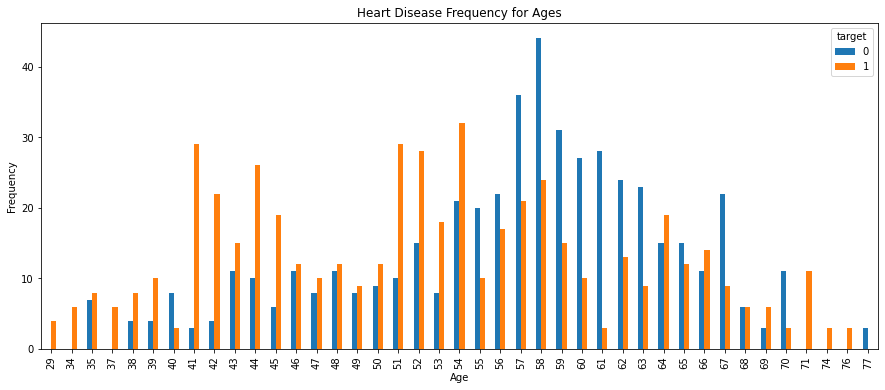

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see that under the age 35 and above the age 70 there is a loss of data and the data spreads to only one target. <br> Therefor we will consider these ages outliers and delete them from the dataset.

In [11]:
print("Number of patients under 35 years old: ", len(df.loc[df['age'] < 35]))
print("Number of patients over 70 years old: ", len (df.loc[df["age"] > 70]))

Number of patients under 35 years old:  10
Number of patients over 70 years old:  20


Over all we are deleting 30 subjects.

In [7]:
# Drop the outliers
under_35 = df[df['age']<35].index
over_70 = df[df['age']>70].index

df.drop(under_35, inplace=True)
df.drop(over_70, inplace=True)

# Check that the outliers have been removed
print("Number of subjects under 35 years old: ", len(df.loc[df['age'] < 35]))
print("Number of subjects over 70 years old: ", len (df.loc[df["age"] > 70]))

Number of subjects under 35 years old:  0
Number of subjects over 70 years old:  0


After cleaning the outliers, we'll look at the ages again.

Text(0.5, 1.0, 'All Patients Ages Histograma - After Cleaning')

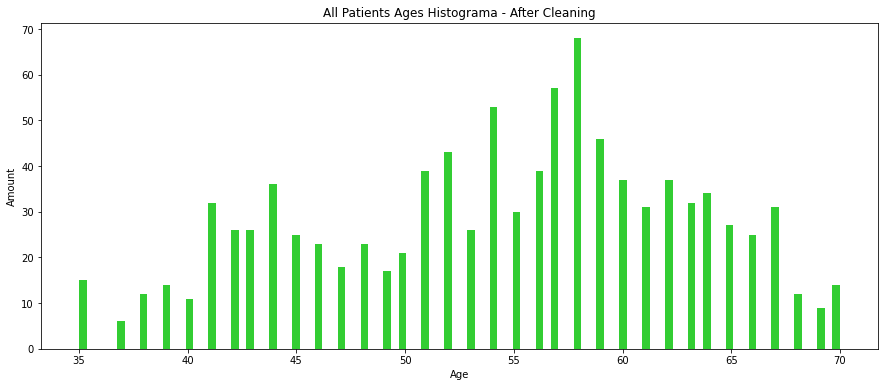

In [13]:
df.age.plot.hist(figsize=(15, 6), bins=100 , color = 'limegreen');
plt.ylabel("Amount")
plt.xlabel("Age")
plt.title("All Patients Ages Histograma - After Cleaning")

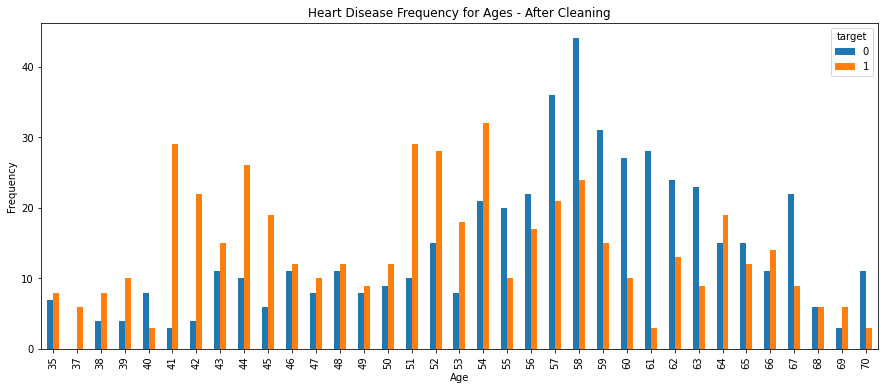

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Ages - After Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

([<matplotlib.axis.XTick at 0x1aa7f8f3670>,
 [Text(0, 0, 'Typical Angina'),
  Text(0, 0, 'Atypical Angina'),
  Text(0, 0, 'Non-Anginal'),
  Text(0, 0, 'Asymptomatic')])

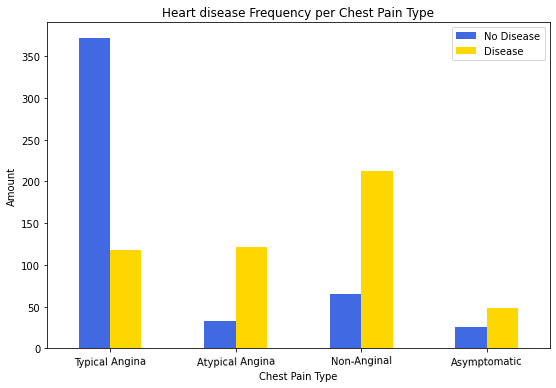

In [15]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(9, 6), color=['royalblue', 'gold'])
plt.title("Heart disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], rotation=1)

We can see that chest pain is not always related to heart disease, although we would think it is. <br> Typical Angina does not show about heart disease, compared to a Non Anginal pain that is more related to heart disease.

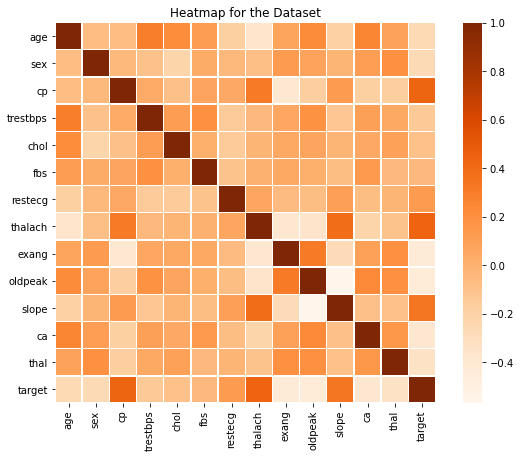

In [16]:
# making a heat map
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('Heatmap for the Dataset')
plt.show()

The above heat map is showing us the correlations amongst the different features of the dataset. <br> We can see that all of the features are very less correlated with each other. <br> This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

After understanding the dataset, <br> Since 'cp', 'thal', 'slope' and 'restecg' are categorical variables, we'll turn them into dummy variables.

In [8]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
d = pd.get_dummies(df['restecg'], prefix = "restecg")

frames = [df, a, b, c , d]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope' , 'restecg'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,0,1,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,1,1,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,0,1,0,0,1,0,0,1,0


Now the dataset is perfectly prepared for modelling.

# Modelling

In [9]:
#Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Splliting the data into train and test.

In [10]:
X = df.drop('target', axis=1)
y = df.target

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(597, 23)
(398, 23)
(597,)
(398,)


In [12]:
y_test.value_counts()

1    207
0    191
Name: target, dtype: int64

We can see that in our test set the target is divided evenly.

In [13]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X,y)
dummy_clf.predict(X)
print(dummy_clf.score(X, y))

0.5015075376884423


We'll define a new function that we'll be used for each model, and show us the Accuracy Score and the Confusion Matrix. <br>
The formula for calculating Metrix Accuracy Score:
$$\frac{TP + TN}{TP + TN + FP + FN}$$

In [14]:
results={}

def HetmapAndConf(model , X_train , y_train , X_test, y_test):
    #training the model
    model.fit(X_train,y_train)
    #model prediction
    y_pred = model.predict(X_test)
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
    results[model]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
    print("Training Accuracy :", model.score(X_train, y_train))
    print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))

## Model 1 - KNN (K Nearest Neighbors Classifier)
We will start with looking for the best k value that will give us the most accurate model.

In [24]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

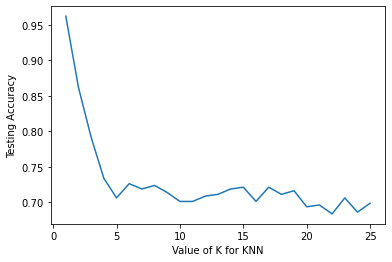

In [25]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

It can be immediately seen that the most accurate model is when k=1 , so this is what we will use.

Training Accuracy : 1.0
Testing Accuracy : 0.9623115577889447

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       191
           1       0.96      0.97      0.96       207

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



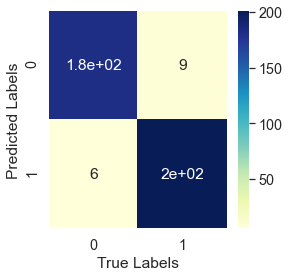

In [26]:
HetmapAndConf(KNeighborsClassifier(n_neighbors=1) , X_train , y_train , X_test, y_test)

This score is only for the specific train and test set that we used. <br> We will now check what is the mean of scores for other ways of splliting the dataset.

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print("Scores Mean: " , round(scores.mean() , 5))

[1.         1.         1.         0.97       0.97       1.
 0.96969697 1.         1.         1.        ]
Scores Mean:  0.99097


It can be seen that the KNN model is well classifing the data. <br> Training accuracy is 100% becauce we are using k=1.

## Model 2 - Logistic Regression

Training Accuracy : 0.8693467336683417
Testing Accuracy : 0.8442211055276382

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       191
           1       0.83      0.88      0.86       207

    accuracy                           0.84       398
   macro avg       0.85      0.84      0.84       398
weighted avg       0.85      0.84      0.84       398



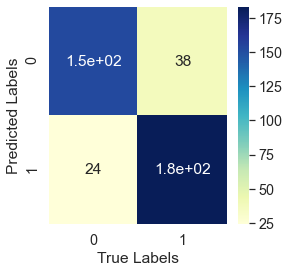

In [28]:
HetmapAndConf(LogisticRegression(max_iter=1500) , X_train , y_train , X_test, y_test)

Again this score is only for the specific train and test set that we used. <br> We will now check what is the mean of scores for other ways of splliting the dataset.

In [29]:
logreg = LogisticRegression(max_iter=10000)
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)
print("Scores Mean: " , round(scores.mean() , 5))

[0.87       0.88       0.86       0.83       0.87       0.87878788
 0.82828283 0.84848485 0.78787879 0.80808081]
Scores Mean:  0.84615


We can see that Logistic Regression is less goof for this dataset.

## Model 3 - Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.992462311557789

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       191
           1       0.99      1.00      0.99       207

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



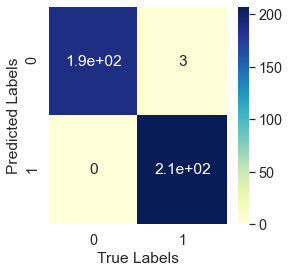

In [30]:
HetmapAndConf(RandomForestClassifier() , X_train , y_train , X_test, y_test)

Again this score is only for the specific train and test set that we used. <br> We will now check what is the mean of scores for other ways of splliting the dataset.

In [31]:
ranFor = RandomForestClassifier() 
scores = cross_val_score(ranFor, X, y, cv=10, scoring='accuracy')
print(scores)
print("Scores Mean: " , round(scores.mean() , 5))

[1.         1.         1.         1.         1.         1.
 1.         1.         0.96969697 1.        ]
Scores Mean:  0.99697


As we can see, this model is better than KNN and certainly than Logistic Regression.

# Evaluating By Roc

As we can imagine, ROC score of Random Forest Classifier will be great.

ROC Score : 100.0 %


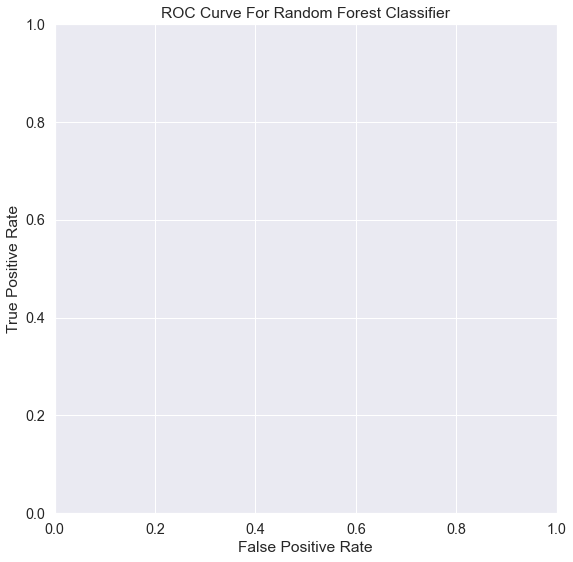

In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
print('ROC Score :' , round(metrics.roc_auc_score(y_test, y_pred_prob),3)*100 , '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.subplots(figsize=(9, 9))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve For Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Looks like Random Forest Classifier is overfitting. <br> 
Let's look at the ROC score of KNN.

ROC Score : 96.2 %


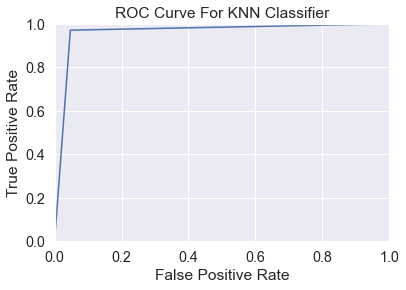

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]
print('ROC Score :' , round(metrics.roc_auc_score(y_test, y_pred_prob),3)*100 , '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve For KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

ROC score of KNN is less than Random Forest Classifier but it less looks like overfitting.<br>
Let's look at the ROC score of Logistic Regression.

ROC Score : 91.7 %


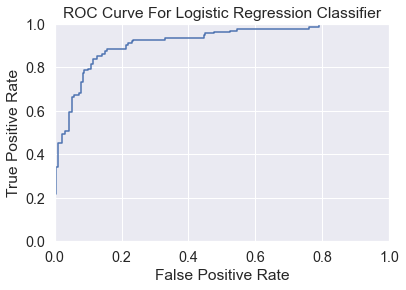

In [34]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print('ROC Score :' , round(metrics.roc_auc_score(y_test, y_pred_prob),3)*100 , '%')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve For Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

Maybe changing the thresholds will make Logistic Regression as good as the others?

This is the confusion matrix right now. <br> We'll notice that we are interested in lowering the FN values which are on the top right in our case.

In [35]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

[[153  38]
 [ 24 183]]


In [36]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])
logreg.predict_proba(X_test)[0:25, :]

True: [0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0]
Pred: [1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0]


array([[0.49063385, 0.50936615],
       [0.29819996, 0.70180004],
       [0.94612782, 0.05387218],
       [0.97849465, 0.02150535],
       [0.12800582, 0.87199418],
       [0.8132653 , 0.1867347 ],
       [0.16707855, 0.83292145],
       [0.9378606 , 0.0621394 ],
       [0.98159391, 0.01840609],
       [0.00875933, 0.99124067],
       [0.99136399, 0.00863601],
       [0.57918591, 0.42081409],
       [0.13662283, 0.86337717],
       [0.4572577 , 0.5427423 ],
       [0.69495861, 0.30504139],
       [0.16707855, 0.83292145],
       [0.82368249, 0.17631751],
       [0.01878292, 0.98121708],
       [0.26309989, 0.73690011],
       [0.04958   , 0.95042   ],
       [0.52226528, 0.47773472],
       [0.20840258, 0.79159742],
       [0.29516954, 0.70483046],
       [0.31587759, 0.68412241],
       [0.6474372 , 0.3525628 ]])

From these arrays we can tell that the threshhold should be largly changed. <br> We'll try to put 0.7.

In [37]:
from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_prob], 0.7)[0]

C:\Users\97254\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [38]:
print(metrics.confusion_matrix(y_test, y_pred))

[[176  15]
 [ 62 145]]


As we can see, FN is much lower but now FP is too high. <br> We cen understand that this model is not as good as the others for this dataset.

In [39]:
results

{KNeighborsClassifier(n_neighbors=1): 0.9623115577889447,
 LogisticRegression(max_iter=1500): 0.8442211055276382,
 RandomForestClassifier(): 0.992462311557789}

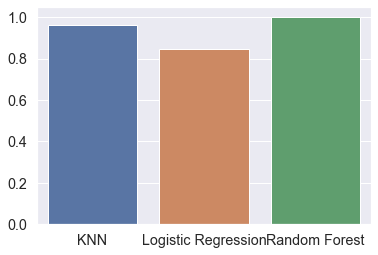

In [40]:
sns.barplot(['KNN' , 'Logistic Regression' , 'Random Forest'], [0.9623115577889447 , 0.8442211055276382 , 1.0])

# Conclusion

Known for its good name, the Random Forest model has proven its effectiveness but is looks like overfotting.<br>
I'll prefer using KNN, although its score is less than Random Forest, because it doesn't look like overfitting.

# Semester B

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

### PCA

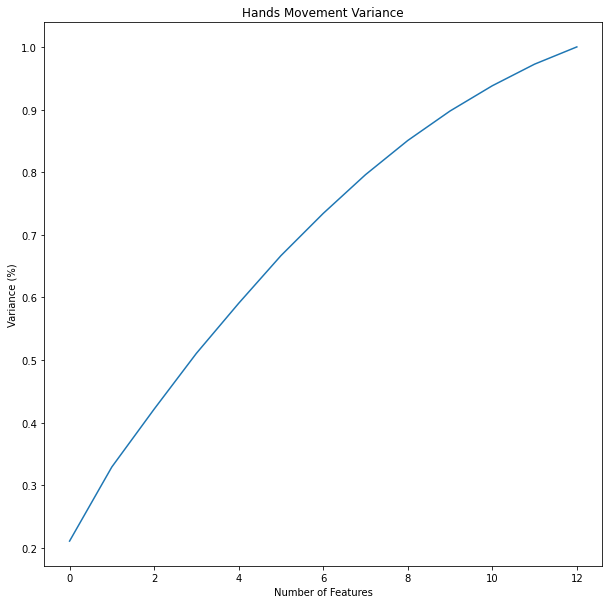

In [22]:
X = df.drop('target', axis=1)
y = df.target

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# fit the PCA with the training data
pca = PCA().fit(X_train)

# Plot the cumulative sum of eigenvalues
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Hands Movement Variance')
plt.show()

There is no such a big amount of features and because of that the changes are not worth it.

C:\Users\97254\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Testing Accuracy : 0.9849246231155779

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       191
           1       0.99      0.99      0.99       207

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


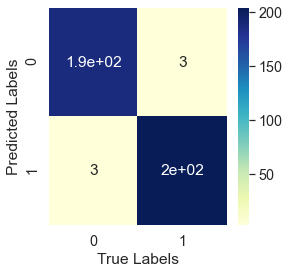

In [56]:
HetmapAndConf(XGBClassifier() , X_train , y_train , X_test, y_test)

Training Accuracy : 0.931323283082077
Testing Accuracy : 0.8844221105527639

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       191
           1       0.90      0.87      0.89       207

    accuracy                           0.88       398
   macro avg       0.88      0.89      0.88       398
weighted avg       0.89      0.88      0.88       398



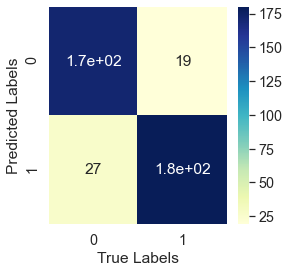

In [57]:
HetmapAndConf(AdaBoostClassifier() , X_train , y_train , X_test, y_test)

In [60]:
r1 = DecisionTreeClassifier()
r2 = KNeighborsClassifier()
r3 = AdaBoostClassifier()
r4 = XGBClassifier()
vr = VotingClassifier([ ('dt', r1),('knn', r2),('ab', r3) , ('xgb', r4) ])
sr = StackingClassifier([ ('dt', r1),('knn', r2),('ab', r3) , ('xgb', r4) ])

C:\Users\97254\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\97254\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[11:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Training Accuracy : 1.0
Testing Accuracy : 0.992462311557789

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       191
           1       1.00      0.99      0.99       207

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



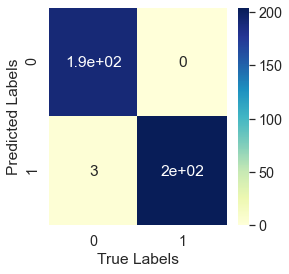

In [61]:
HetmapAndConf(sr , X_train , y_train , X_test, y_test)

C:\Users\97254\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[11:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9798994974874372
Testing Accuracy : 0.9447236180904522

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       191
           1       0.98      0.91      0.94       207

    accuracy                           0.94       398
   macro avg       0.95      0.95      0.94       398
weighted avg       0.95      0.94      0.94       398



C:\Users\97254\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


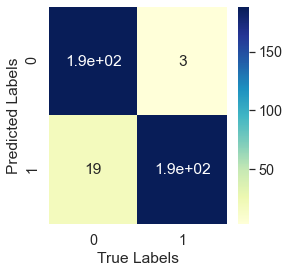

In [62]:
HetmapAndConf(vr , X_train , y_train , X_test, y_test)